# Milestone work

## Onboarding Day 4 tasks

How many different companies are represented in the data set?

In [9]:
import pandas as pd
import numpy as np

file = 'Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv'

df = pd.read_csv(file)
n_companies = df['Company Name'].count()
n_companies  # Q1 answer = 450

450

What is the total number of jobs created for businesses in Queens?

In [10]:
n_jobs = df[df['Borough'] == 'Queens']['Job created'].sum()
n_jobs  # Q2 answer = 102

102.0

How many different unique email domains names are there in the data set?

In [11]:
n_emails = df['company email'].nunique()
n_emails  # Q3 answer = 420

420

Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [12]:
df_nta = df.groupby('NTA').filter(lambda x: x['Company Name'].count() >= 5).groupby('NTA')\
    .agg({'Total Savings': np.mean, 'Job created': np.sum})

out_file = 'Q4.csv'
df_nta.to_csv(out_file)

## Onboarding Day 5 tasks

- scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

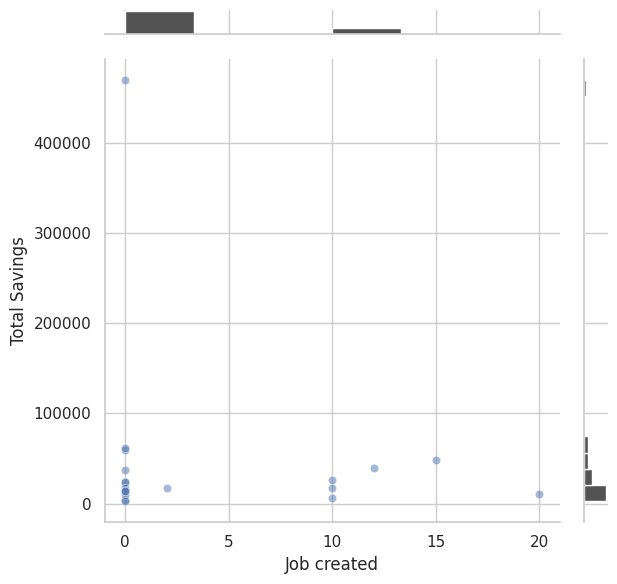

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, a linear scale
sns.set_theme(style="whitegrid")
g = sns.JointGrid(data=df_nta, x="Job created", y="Total Savings", space=1, ratio=10)  # Decided not to color code w/ 20 items...
g.plot_joint(sns.scatterplot, alpha=0.5)
g.plot_marginals(sns.histplot, color="k")
g.ax_joint.set_xticks([0, 5, 10, 15, 20])
plt.show()

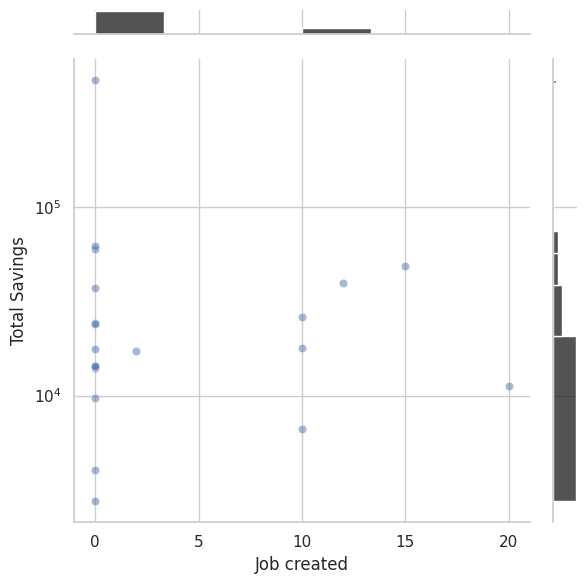

In [17]:
# now, log scale
g = sns.JointGrid(data=df_nta, x="Job created", y="Total Savings", space=1, ratio=10)
g.plot_joint(sns.scatterplot, alpha=0.5)
g.plot_marginals(sns.histplot, color="k")
g.ax_joint.set_yscale('log')
g.ax_marg_y.set_yscale('log')  # seaborn marginal histograms seem to default bin size to constant width in linear space, not log space
g.ax_joint.set_xticks([0, 5, 10, 15, 20])
plt.show()

  - histogram of the log of the average total savings.

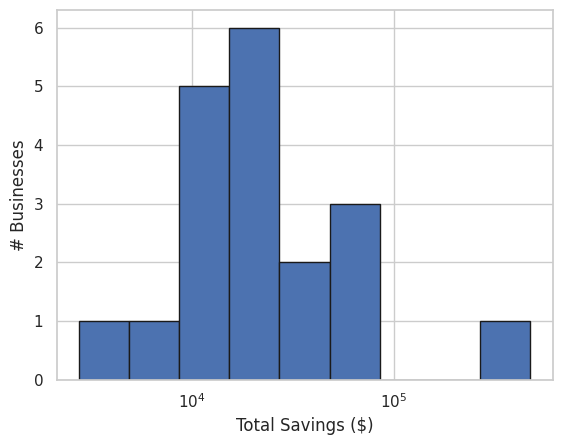

In [18]:
savings = df_nta["Total Savings"]
bins = np.logspace(np.log10(min(savings)), np.log10(max(savings)), 10)
_, ax = plt.subplots()
counts, _ = np.histogram(df_nta["Total Savings"], bins)
ax.bar(bins[:-1], counts, width=np.diff(bins), ec="k", align="edge")
ax.set_xscale("log")
plt.xlabel("Total Savings ($)")
plt.ylabel("# Businesses")
plt.show()

 - line plot of the total jobs created for each month.

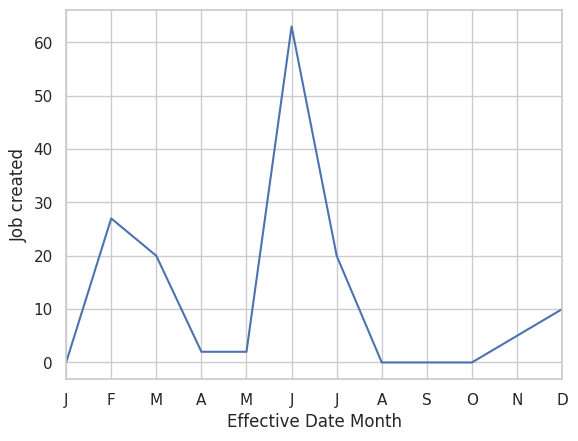

In [22]:
df["Effective Date"] = pd.to_datetime(df["Effective Date"])
df["Effective Date Month"] = df["Effective Date"].apply(lambda x: x.month)
jobs_each_month = df.groupby("Effective Date Month").agg({"Job created": np.sum})
l = sns.lineplot(x=jobs_each_month.index, y=jobs_each_month["Job created"])
l.set_xticks(range(1, 13))
l.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
l.set_xlim([1, 12])
plt.show()